# Details of Logistic Regression

Chapter 3

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectPercentile

#Settings for rendering plots
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
mpl.rcParams["figure.dpi"] = 400

In [2]:
# read in data
df = pd.read_csv("Data/Chapter_1_cleaned_data.csv")

In [3]:
feature_responses = df.columns.tolist()

In [4]:
feature_responses[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [5]:
feature_responses[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [6]:
items_to_remove = ["ID","SEX","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6","EDUCATION_CAT","graduate school","high school",
                  "none","others","university"]

In [7]:
# Example list comprehension
example_list_comp = [item for item in range(5)]
example_list_comp

[0, 1, 2, 3, 4]

In [8]:
feature_responses_clean = [item for item in feature_responses if item not in items_to_remove]
feature_responses_clean

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [9]:
corr = df[feature_responses_clean].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<AxesSubplot:>

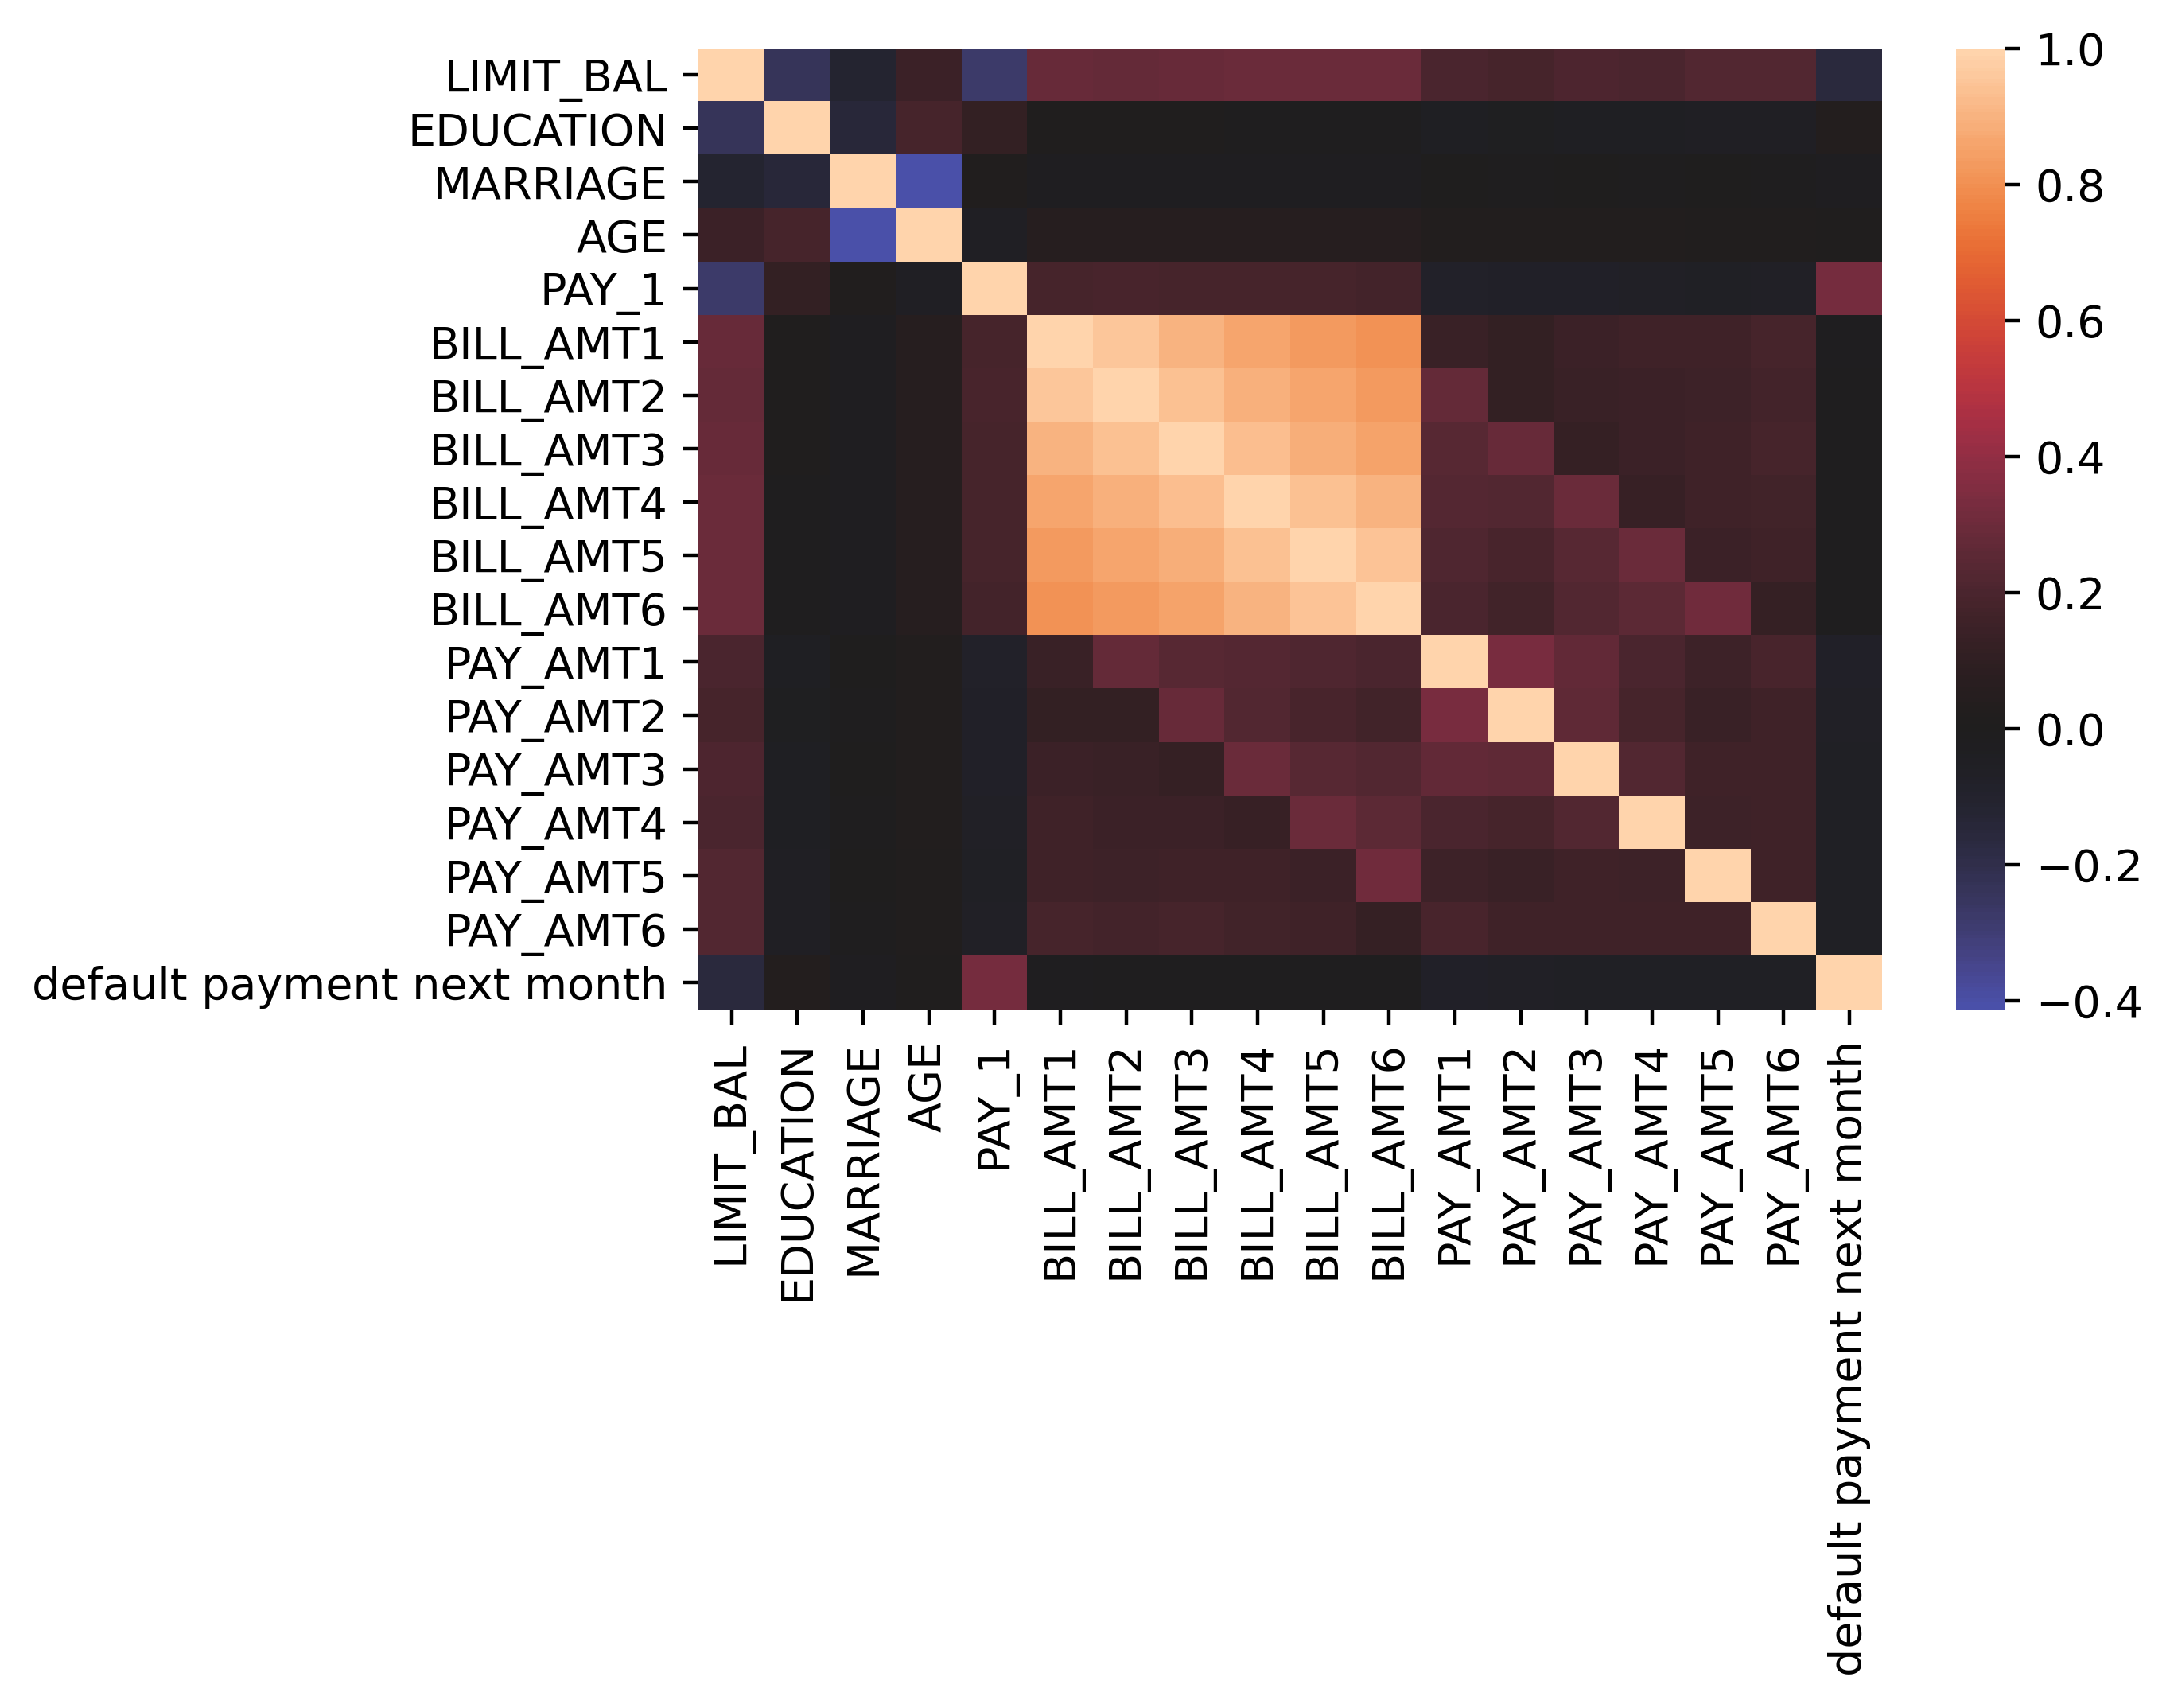

In [10]:
# Create a heat map
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, center = 0)

# F Tests

- Complete an F test in sckit learn

In [11]:
X = df[feature_responses_clean].iloc[:,:-1].values
Y = df[feature_responses_clean].iloc[:,-1].values
print(X.shape, Y.shape)

(26664, 17) (26664,)


In [12]:
[f_stat, f_p_value] = f_classif(X,Y)

In [13]:
f_test_df = pd.DataFrame({"Feature":feature_responses_clean[:-1],"F statistic":f_stat,"p value":f_p_value})
f_test_df.sort_values("p value")

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [14]:
selector = SelectPercentile(f_classif, percentile = 20)
selector.fit(X,Y)

SelectPercentile(percentile=20)

In [15]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [16]:
features = feature_responses_clean[:-1]
best_features = [features[counter] for counter in range(len(features)) if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

In [23]:
overall_default_rate = df["default payment next month"].mean()
overall_default_rate

0.2217971797179718

In [25]:
group_by_pay_mean_y = df.groupby("PAY_1").agg({"default payment next month":np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


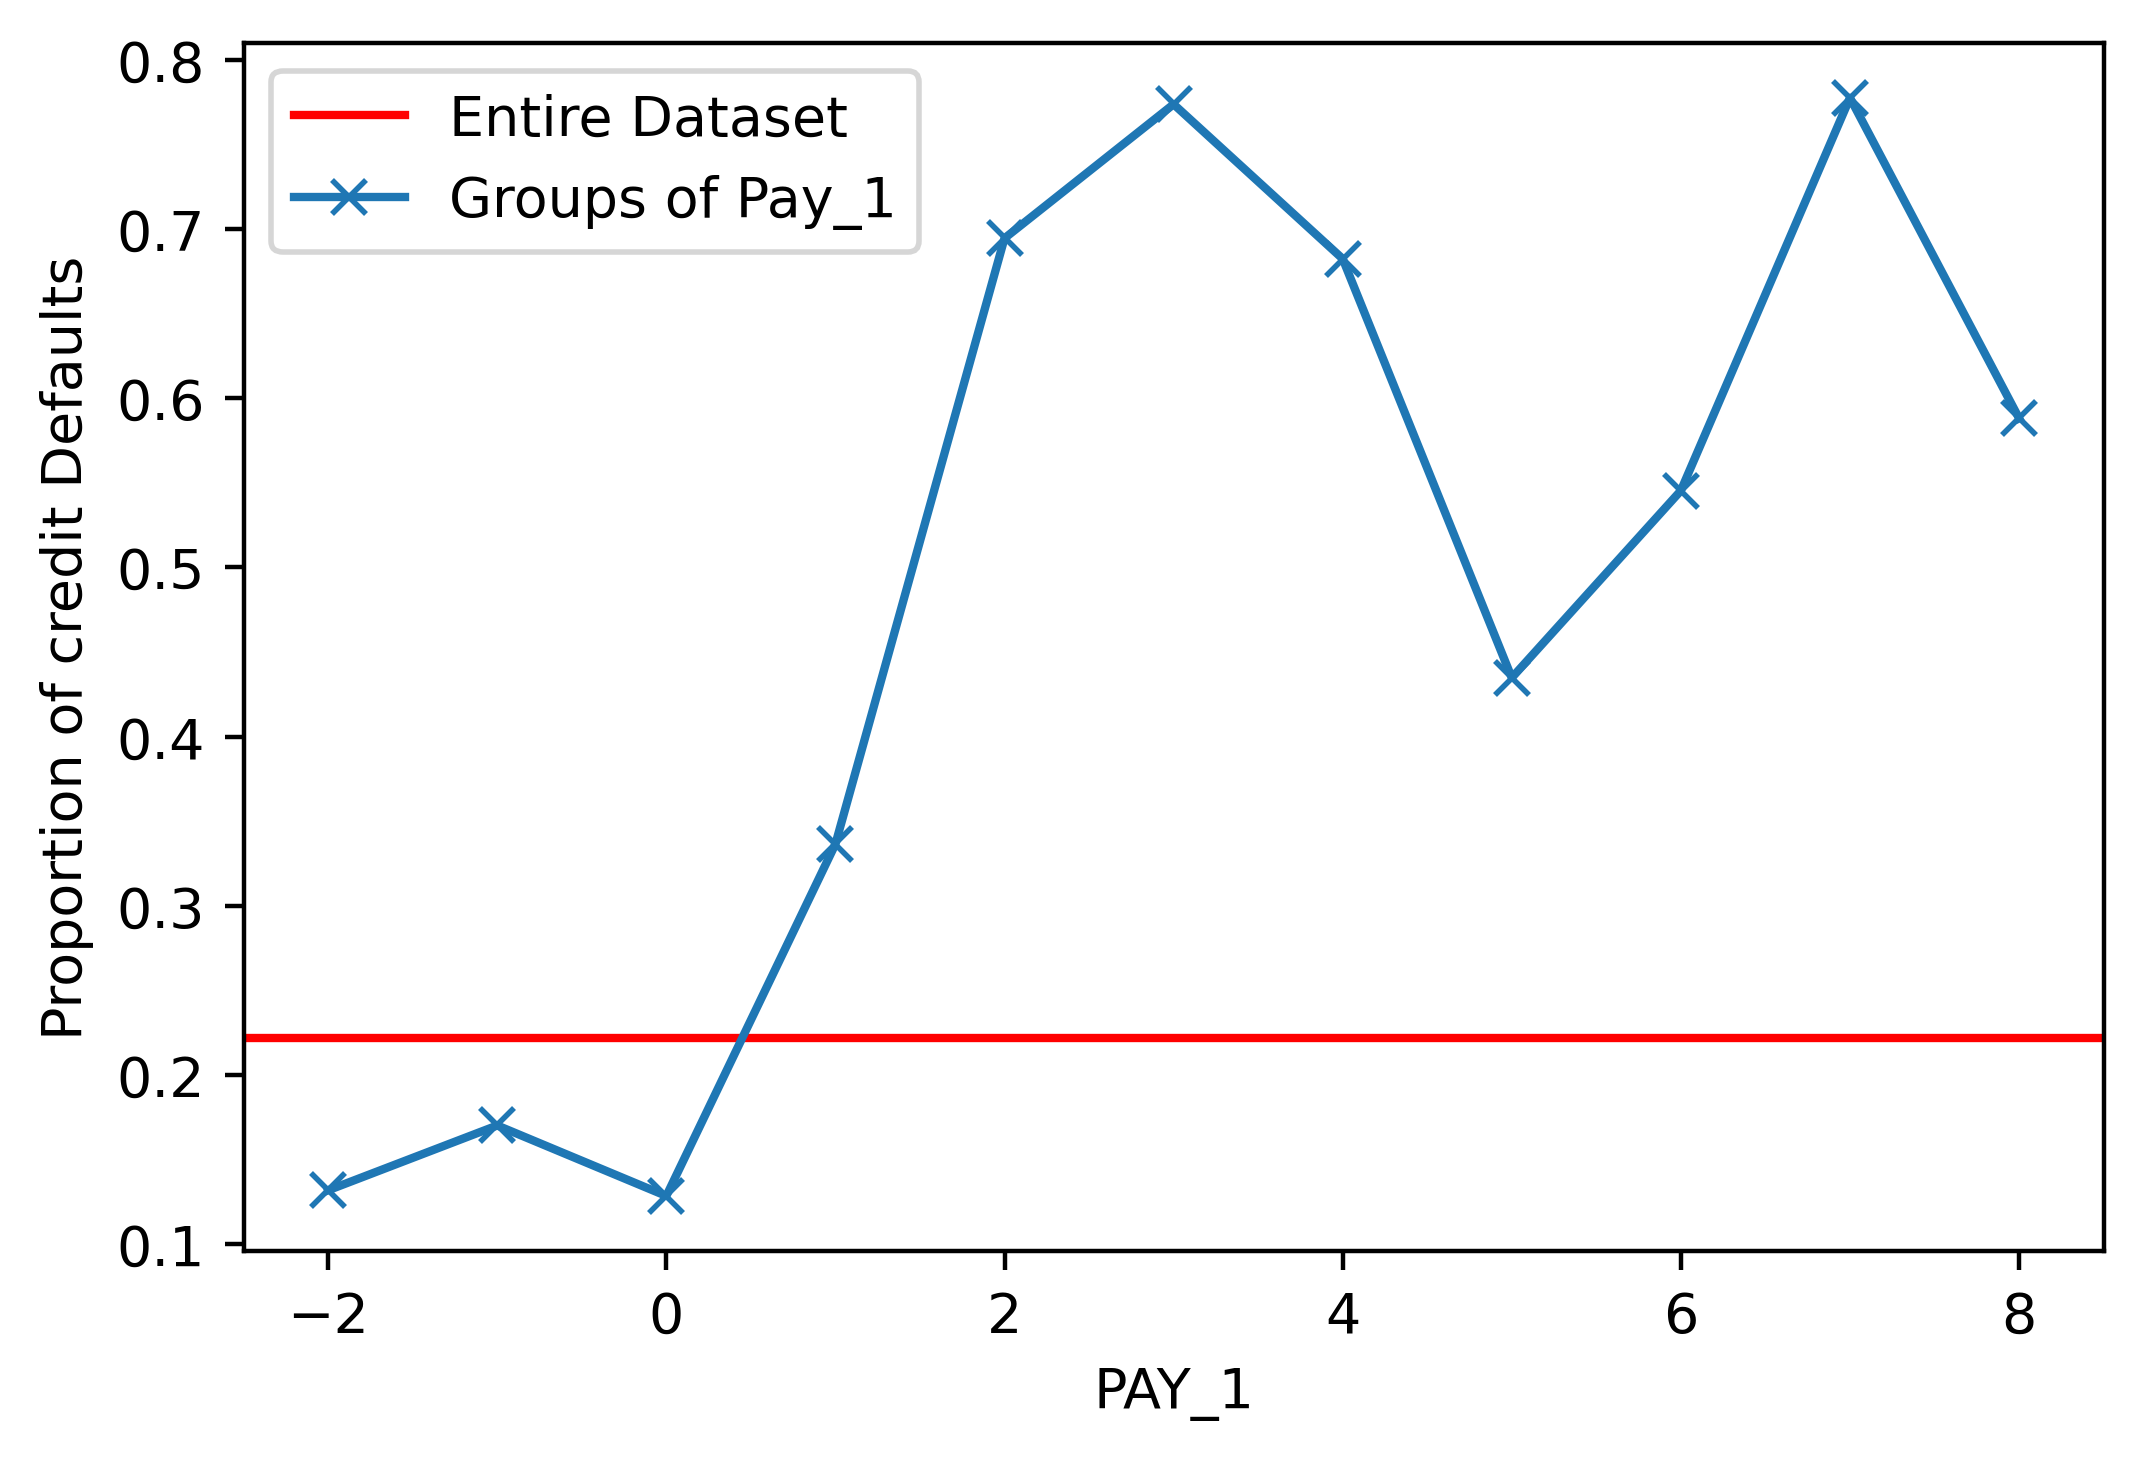

In [30]:
axes = plt.axes()
axes.axhline(overall_default_rate, color = "red")
group_by_pay_mean_y.plot(marker = "x", legend = False, ax = axes)
axes.set_ylabel("Proportion of credit Defaults")
axes.legend(["Entire Dataset", "Groups of Pay_1"])

In [33]:
pos_mask = Y == 1
neg_mask = Y = 0

Text(0, 0.5, 'Number of Accounts')

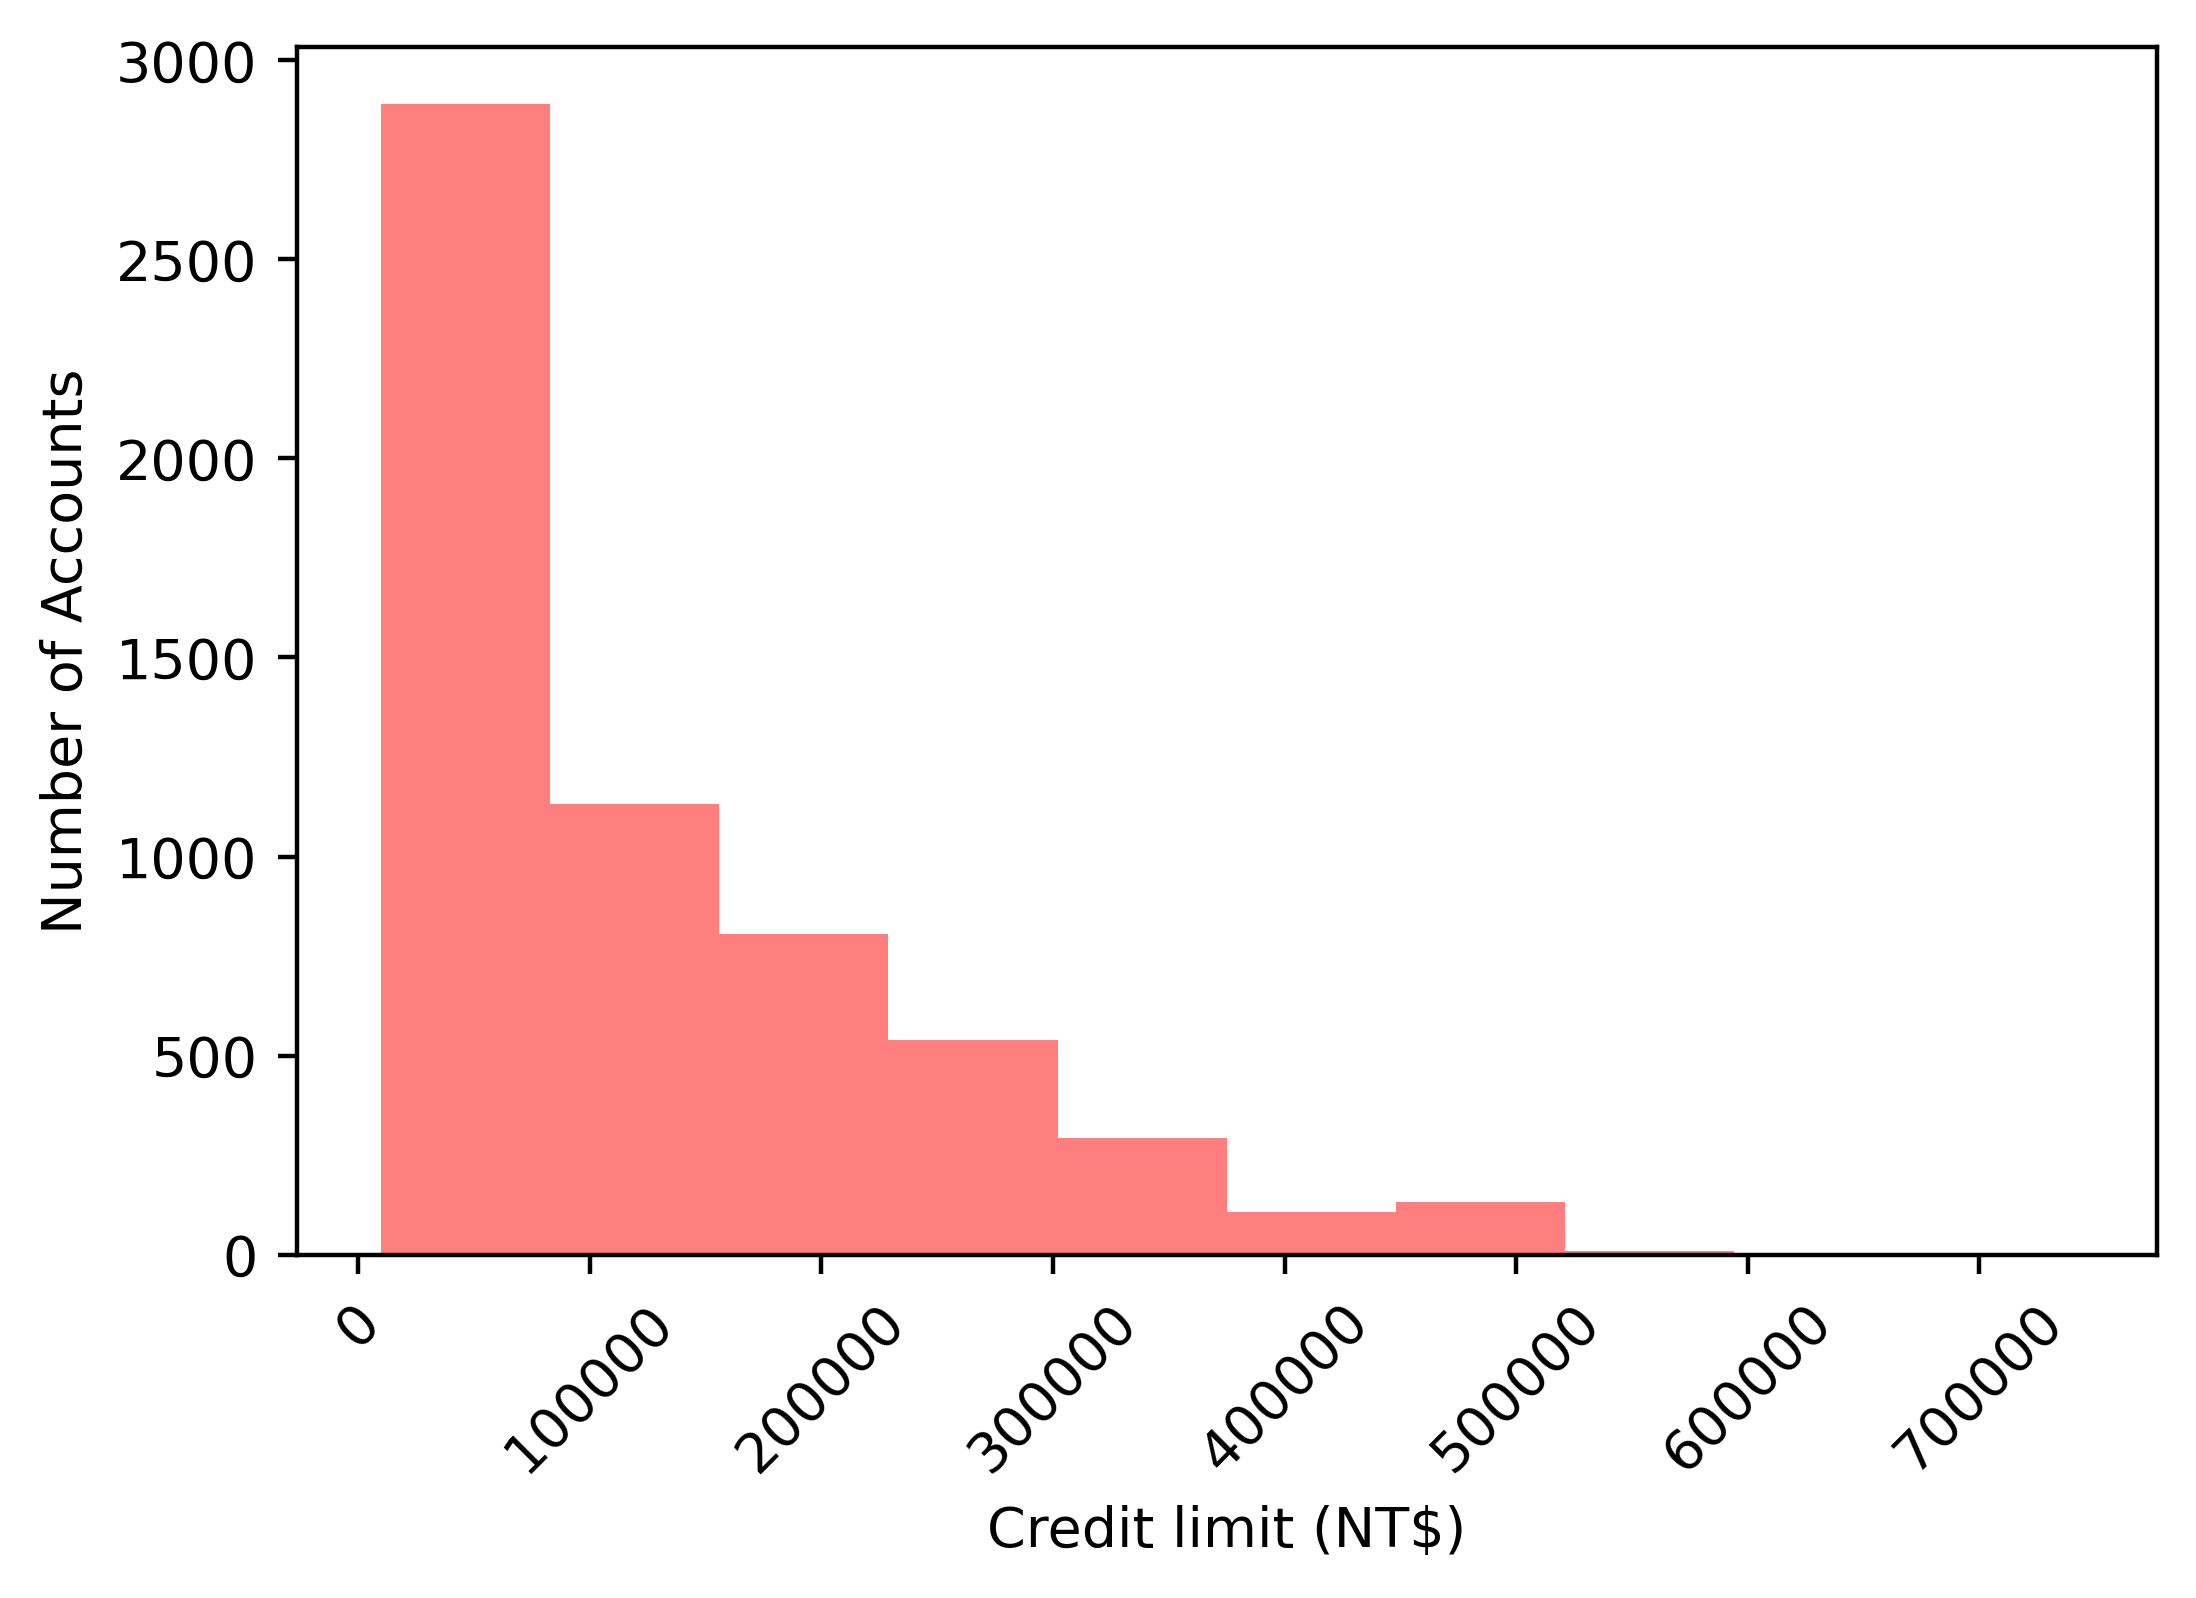

In [44]:
axes = plt.axes()
axes.hist(df.loc[neg_mask,"LIMIT_BAL"], alpha = 0.5, color = "blue")
axes.hist(df.loc[pos_mask, "LIMIT_BAL"], alpha = 0.5, color = "red")
axes.tick_params(axis = "x", labelrotation = 45)
axes.set_xlabel("Credit limit (NT$)")
axes.set_ylabel("Number of Accounts")
#axes.legend(["Not Defaulted","Defaulted"])
#axes.set_title("Credit Limits by response variable")